In [51]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [53]:
# import networkx as nx
# from IPython.core.display import Image
# from networkx.drawing.nx_pydot import to_pydot

# g1 = nx.DiGraph()
# g1.add_edge("A", "B")
# g1.add_edge("B", "C")
# d1 = to_pydot(g1)
# d1.set_dpi(300)
# d1.set_rankdir("LR")
# d1.set_margin(0.2)
# Image(d1.create_png(), width=600)

Graphviz 설치 오류 또는 경로 설정 이상으로 실행안됨
블로그 보고 추후 오류 수정 예정
>- http://yeyyyyee.blogspot.com/2019/10/graphviz-dot-not-found-in-path.html
>- https://graphviz.gitlab.io/_pages/Download/Download_windows.html


## 베이지안 네트워크 모형
>베이지안 네트워크 모형 : 인과관계가 확실하여 방향성 그래프를 표시할 수 있는 모형

예)

A, B, C가 각각 어떤 학생의 

* A: 건강 상태
* B: 공부 시간
* C: 시험 성적

을 나타낸 것이라고 하자. 이 확률변수는 각각 $\{0, 1, 2\}$라는 값을 가질 수 있는데 하(0), 중(1), 상(2)의 상태를 나타낸다. 
즉 $A=0$이면 건강 상태가 안좋은 것이고 $B=1$이면 공부 시간이 보통이며 $C=2$이면 시험 성적이 좋은 것이다.

조건부 확률 분포를 표로 나타내면 다음과 같다

In [3]:
from pgmpy.factors.discrete import TabularCPD

## 3인자 가지면 (3,1) 형태로 확률 입력

P_A  = TabularCPD('A', 3, [[0.1],[0.6],[0.3]])
print(P_A)


+------+-----+
| A(0) | 0.1 |
+------+-----+
| A(1) | 0.6 |
+------+-----+
| A(2) | 0.3 |
+------+-----+


In [4]:
# P(B|A)
# 확률 입력은 행단위로
P_B_I_A = TabularCPD('B', 3, 
                     np.array([[0.6, 0.2, 0.1], [0.3, 0.5, 0.3], [0.1, 0.3, 0.6]]),
                    evidence=['A'], evidence_card =[3])
print(P_B_I_A)

+------+------+------+------+
| A    | A(0) | A(1) | A(2) |
+------+------+------+------+
| B(0) | 0.6  | 0.2  | 0.1  |
+------+------+------+------+
| B(1) | 0.3  | 0.5  | 0.3  |
+------+------+------+------+
| B(2) | 0.1  | 0.3  | 0.6  |
+------+------+------+------+


In [6]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel


P_A = TabularCPD('A', 3, [[0.1],[0.6], [0.3]])
P_B_I_A = TabularCPD('B', 3, 
    np.array([[0.6, 0.2, 0.1], [0.3, 0.5, 0.3], [0.1, 0.3, 0.6]]),
    evidence=['A'], evidence_card=[3])
P_C_I_B = TabularCPD('C', 3, 
    np.array([[0.7, 0.1, 0.1], [0.2, 0.6, 0.1], [0.1, 0.3, 0.8]]),
    evidence=['B'], evidence_card=[3])
                     
model = BayesianModel([('A', 'B'), ('B', 'C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)

# d = to_pydot(model)
# d.set_dpi(300)
# d.set_margin(0.2)
# d.set_rankdir("LR")
# Image(d.create_png(), width=600)

CPD 객체는 `marginalize` 메서드로 특정 변수의 모든 경우의 확률을 더하는 sum-out을 할 수 있다.

$$ P(B) = \sum_A P(A,B) = \sum_A P(B|A)P(A) $$

In [7]:
#P(A,B)
print(P_B_I_A * P_A)

+------+----------------------+------+------+
| A    | A(0)                 | A(1) | A(2) |
+------+----------------------+------+------+
| B(0) | 0.06                 | 0.12 | 0.03 |
+------+----------------------+------+------+
| B(1) | 0.03                 | 0.3  | 0.09 |
+------+----------------------+------+------+
| B(2) | 0.010000000000000002 | 0.18 | 0.18 |
+------+----------------------+------+------+


In [8]:
# sum(P(A,B)) = P(B)
P_B = (P_B_I_A * P_A).marginalize(["A"],inplace = False)
print(P_B)

+------+------+
| B(0) | 0.21 |
+------+------+
| B(1) | 0.42 |
+------+------+
| B(2) | 0.37 |
+------+------+


In [9]:
#P(C|B)
P_C_I_B = TabularCPD('C', 3, 
    np.array([[0.7, 0.1, 0.1], [0.2, 0.6, 0.1], [0.1, 0.3, 0.8]]),
    evidence=['B'], evidence_card=[3])
print(P_C_I_B)

+------+------+------+------+
| B    | B(0) | B(1) | B(2) |
+------+------+------+------+
| C(0) | 0.7  | 0.1  | 0.1  |
+------+------+------+------+
| C(1) | 0.2  | 0.6  | 0.1  |
+------+------+------+------+
| C(2) | 0.1  | 0.3  | 0.8  |
+------+------+------+------+


In [10]:
#P(C)= Sum(P(C,B))
P_C = (P_C_I_B* P_B).marginalize(["B"], inplace=False)
print(P_C)

+------+-------+
| C(0) | 0.226 |
+------+-------+
| C(1) | 0.331 |
+------+-------+
| C(2) | 0.443 |
+------+-------+


### 조건부 확률들을 결합하여 베이지안 네트워크로 만들기

In [11]:
from pgmpy.models import BayesianModel

model = BayesianModel([('A','B'),('B','C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)
model.check_model()

True

In [12]:
# from IPython.core.display import Image
# from networkx.drawing.nx_pydot import to_pydot

# d = to_pydot(model)
# d.set_dpi(300)
# d.set_margin(0.2)
# d.set_rankdir("LR")
# Image(d.create_png(), width=600)

건강 상태가 좋은 경우(A=2)의 성적(C) 분포를 구하라.

In [13]:
#P(C|A=2)
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

print(infer.query(["C"], evidence={"A": 2}))

Eliminating: B: 100%|██████████| 1/1 [00:00<00:00, 255.11it/s]


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.1600 |
+------+----------+
| C(1) |   0.2600 |
+------+----------+
| C(2) |   0.5800 |
+------+----------+


In [14]:
#P(A=2)
P_A2 = TabularCPD('A', 3, [[0],[0], [1]])
#P(B) = Sum(P(B,A=2))
P_B = (P_B_I_A * P_A2).marginalize(["A"], inplace=False)
#P(C)= Sum(P(C,B))
P_C = (P_C_I_B * P_B).marginalize(["B"], inplace=False)
print(P_C)


+------+------+
| C(0) | 0.16 |
+------+------+
| C(1) | 0.26 |
+------+------+
| C(2) | 0.58 |
+------+------+


건강 상태는 좋지만(A=2), 공부를 하지 않는 경우(B=0)의 성적 분포를 구하라.

In [15]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

#P(B=0), A는 상관없다
P_B2 = TabularCPD('B', 3, [[1],[0], [0]])
P_C = (P_C_I_B* P_B2).marginalize(["B"], inplace=False)
print(P_C)

+------+-----+
| C(0) | 0.7 |
+------+-----+
| C(1) | 0.2 |
+------+-----+
| C(2) | 0.1 |
+------+-----+


In [16]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

print(infer.query(["C"], evidence={"A": 2, "B":0}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.7000 |
+------+----------+
| C(1) |   0.2000 |
+------+----------+
| C(2) |   0.1000 |
+------+----------+


In [17]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

print(infer.query(["A"], evidence={"B": 0}))

Eliminating: C: 100%|██████████| 1/1 [00:00<00:00, 167.38it/s]


+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


In [18]:
print(infer.query(["A"], evidence={"B": 0, "C":0}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


## 베이지안 네트워크의 결합확률분포

베이지안 네트워크를 만들려면 조사 대상이 되는 확률변수를 노드(node)로 생성하고 인과관계가 있는 노드를 방향성 간선(directed edge)로 연결한다. 
베이지안 네트워크를 구성하는 확률변수의 결합확률분포는 다음처럼 주어진다.

$$ P(X_1, \cdots, X_N) = \prod_{i=1}^N P(X_i | Pa(X_i)) $$

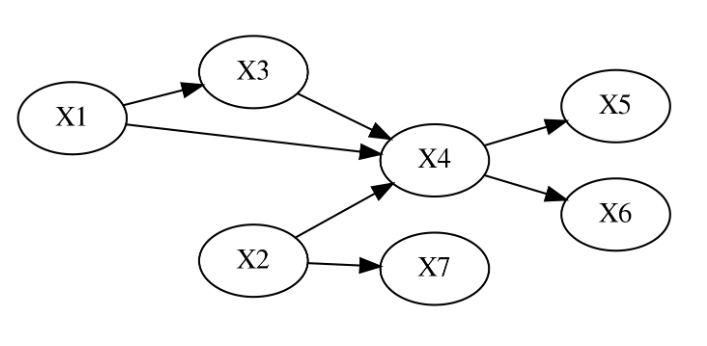

### 머리- 머리 결합
- A,B가 서로 독립이다. 
- 하지만 C값을 알고있다면 A,B가 서로 종속관계가 된다
- 수식으로 표현하면 다음과 같다
$$ P(A,B,C) = P(A)P(B)P(C|A,B) $$

$$ P(A,B) = \sum_c P(A)P(B)P(C|A,B) = P(A)P(B) $$


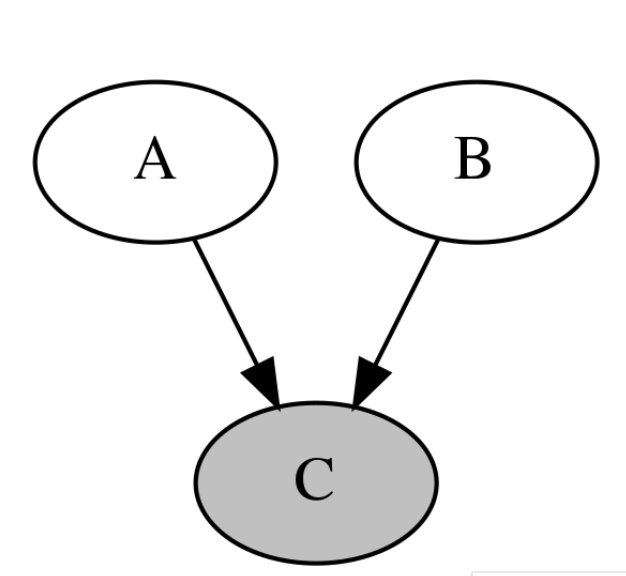

### 방향성 분리(d-seperation)정리
- A와 B가 C에 대해서 조건부 독립인 경우 다음 조건을 만족해야한다
1. C가 A,B 사이의 경로상에 있는 꼬리-꼬리 결합이거나, 머리-꼬리 결합이다.
2. C가 A,B 사이의 경로상에 있는 머리-머리 결합이거나 혹은 이러한 노드의 자손이 아니어야 한다.


## 마코프 네트워크
- 무방향성 그래프

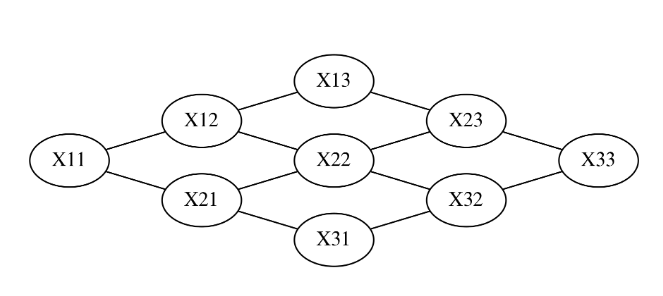

### 클리크와 팩터
- 마코프 네트워크를 구성하는 요소
- 클리크를 구성하는 확률변수의 분포 : 포텐셜 함수(팩터)
    
<br>
- 팩터(factor)

> 가능한 모든 결과의 조합에 대한 결합확률분포 또는 조건부확률분포에 비례하는 함수

>더해서 1이 되어야 할 필요는 없다.


$$ p(X, Y) = \dfrac{1}{Z}\psi_1(X, Y) $$

$$ p(X | Y) = \dfrac{1}{Z}\psi_2(X, Y) $$



In [19]:
#DiscreateFactor : 팩터정의하는 함수
from pgmpy.factors.discrete import DiscreteFactor

#팩터 정의
phi = DiscreteFactor(['x1','x2','x3'],[2,2,2],np.arange(8))
print(phi)

+-------+-------+-------+-----------------+
| x1    | x2    | x3    |   phi(x1,x2,x3) |
+=======+=======+=======+=================+
| x1(0) | x2(0) | x3(0) |          0.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(0) | x3(1) |          1.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(1) | x3(0) |          2.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(1) | x3(1) |          3.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(0) | x3(0) |          4.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(0) | x3(1) |          5.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(1) | x3(0) |          6.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(1) | x3(1) |          7.0000 |
+-------+-------+-------+-----------------+


In [22]:
# to_factor CPD 결합본포 객체를 팩터로 변환 (결합확률분포에 비례)
print(P_B_I_A)

+------+------+------+------+
| A    | A(0) | A(1) | A(2) |
+------+------+------+------+
| B(0) | 0.6  | 0.2  | 0.1  |
+------+------+------+------+
| B(1) | 0.3  | 0.5  | 0.3  |
+------+------+------+------+
| B(2) | 0.1  | 0.3  | 0.6  |
+------+------+------+------+


In [24]:
print(P_B_I_A.to_factor())

+------+------+------------+
| B    | A    |   phi(B,A) |
+======+======+============+
| B(0) | A(0) |     0.6000 |
+------+------+------------+
| B(0) | A(1) |     0.2000 |
+------+------+------------+
| B(0) | A(2) |     0.1000 |
+------+------+------------+
| B(1) | A(0) |     0.3000 |
+------+------+------------+
| B(1) | A(1) |     0.5000 |
+------+------+------------+
| B(1) | A(2) |     0.3000 |
+------+------+------------+
| B(2) | A(0) |     0.1000 |
+------+------+------------+
| B(2) | A(1) |     0.3000 |
+------+------+------------+
| B(2) | A(2) |     0.6000 |
+------+------+------------+


In [29]:
## reduce: (factor 개체)어떤 확률변수가 특정한 값을 가지는 경우만 추출
### likelihood 여서 합이 1이 아니라는것 염두
### B=0일때 조건부확률에 비례하는 값
print(P_B_I_A.to_factor().reduce([("B",0)], inplace=False))



+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.6000 |
+------+----------+
| A(1) |   0.2000 |
+------+----------+
| A(2) |   0.1000 |
+------+----------+


## nomalize : 정규화
- 합이 1이 되도록 정규화
- 조건부확률

In [30]:
# P(A|B=0) => 조건부확률
print(P_B_I_A.to_factor().reduce([("B",0)], inplace=False).normalize(inplace=False))

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.6667 |
+------+----------+
| A(1) |   0.2222 |
+------+----------+
| A(2) |   0.1111 |
+------+----------+


## 마코프 네트워크의 결합확률분포
- 모든 클리크의 팩터의 곱

$$ P(X) = \dfrac{1}{Z(X)} \prod_{\{C\}} \psi_C(X_C) $$


$C$는 클리크, $X_C$는 그 클리크 안의 확률변수, $\psi_C$는 그 클리크의 팩터, $\{C\}$는 모든 클리크의 집합, $Z$는 파티션 함수(partition)함수

예)
3 x 3 이미지의 경우 9개의 확률변수의 결합확률분포는 다음처럼 표현할 수 있다.

$$ 
P(X_{11}, \ldots, X_{33}) = 
\dfrac{1}{Z}
\prod 
\psi(X_{11}, X_{12}) 
\psi(X_{11}, X_{21}) 
\psi(X_{12}, X_{13}) 
\cdots
\psi(X_{23}, X_{33}) 
\psi(X_{32}, X_{33}) 
$$

## 에너지 함수
- 벡터함수는 다음과 같은 형태로 표시할 수 있다.

$$ \psi(X) = \exp(−E(X)) $$

$E(X)$ : 에너지 함수(energe function). 확률이 높을수록 에너지 함수는 작아짐

예)

베르누이 확률변수(값 0,1) $X1$,$X2$
$$ E(X_1, X_2) = -3(2X_1 - 1)(2X_2 - 1) $$

- 펙터의 값
> $$ \psi(X_1 = 1, X_2 = 1) = e^3 $$
$$ \psi(X_1 = 0, X_2 = 0) = e^3 $$
$$ \psi(X_1 = 1, X_2 = 0) = e^{-3} $$
$$ \psi(X_1 = 0, X_2 = 1) = e^{-3} $$

# 네트워크 추론

- 확률모형에서 일부 확률변수의 값이 주어졌을 때 다른 확률 변수의 값이 얼마인지 알아내는 것

> 조건부 확률분포함수 $p(X_{\text{unknown}}|\{X\}_{\text{known}})$를 알면 일부 확률변수의 값 $\{X\}_{\text{known}}$이 주어졌을 때 다른 확률변수 $X_{\text{unknown}}$의 확률 $p(X_{\text{unknown}})$을 알 수 있으므로 추론은 조건부 확률분포함수 $p(X_{\text{unknown}}|\{X\}_{\text{known}})$를 알아내는 것과 같다.

In [38]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel

# A :건강상태
# B : 공부시간
# c : 시험성적
## 각각 하,중,상 값을 가짐

P_A = TabularCPD('A', 3, [[0.1],[ 0.6], [0.3]])
P_B_I_A = TabularCPD('B', 3, 
    np.array([[0.6, 0.2, 0.1], [0.3, 0.5, 0.3], [0.1, 0.3, 0.6]]),
    evidence=['A'], evidence_card=[3])
P_C_I_B = TabularCPD('C', 3, 
    np.array([[0.7, 0.1, 0.1], [0.2, 0.6, 0.1], [0.1, 0.3, 0.8]]),
    evidence=['B'], evidence_card=[3])
print(P_A)
print('='*50)
print(P_B_I_A)
print('='*50)
print(P_C_I_B)

+------+-----+
| A(0) | 0.1 |
+------+-----+
| A(1) | 0.6 |
+------+-----+
| A(2) | 0.3 |
+------+-----+
+------+------+------+------+
| A    | A(0) | A(1) | A(2) |
+------+------+------+------+
| B(0) | 0.6  | 0.2  | 0.1  |
+------+------+------+------+
| B(1) | 0.3  | 0.5  | 0.3  |
+------+------+------+------+
| B(2) | 0.1  | 0.3  | 0.6  |
+------+------+------+------+
+------+------+------+------+
| B    | B(0) | B(1) | B(2) |
+------+------+------+------+
| C(0) | 0.7  | 0.1  | 0.1  |
+------+------+------+------+
| C(1) | 0.2  | 0.6  | 0.1  |
+------+------+------+------+
| C(2) | 0.1  | 0.3  | 0.8  |
+------+------+------+------+


### 연습문제
이 그래프 확률모형을 기반으로 다음과 같은 문제를 풀어보자.

1. 이 학생의 시험 성적이 어떤 확률분포를 가질 것인가? 어떤 성적을 맞을 확률이 가장 높은가?

-> P(C)

2. 이 학생의 건강 상태가 좋았다. 어떤 성적을 맞을 확률이 가장 높은가?

-> P(C|A=2)

3. 이 학생의 공부 시간이 적었지만 시험 성적은 좋았다. 건강 상태가 어땠을까?

-> P(A|B =0, C=2)

In [37]:
P_B = (P_B_I_A * P_A).marginalize(["A"],inplace = False)
print(P_B)

+------+------+
| B(0) | 0.21 |
+------+------+
| B(1) | 0.42 |
+------+------+
| B(2) | 0.37 |
+------+------+


## 변수제거(variable elimination)
 > 확률변수 B의 분포가 이미 계산된 상태라면 확률변수 A의 영향은 없어진다

$$ P(C) = \sum_{B} P(C|B)P(B) $$

>변수제거 : 이런식으로 알고있는 확률변수 혹은 무조건부 확률변수분포를 알고있는 확률변수부터 네트워크를 따라 차례대로 확률분포를 계산하는 방식

In [40]:
# 문제 1
## 아무런 조건이 없는 경우 시험 성적의 분포

from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
print(infer.query(["C"]))

Eliminating: A: 100%|██████████| 2/2 [00:00<00:00, 180.49it/s]


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2260 |
+------+----------+
| C(1) |   0.3310 |
+------+----------+
| C(2) |   0.4430 |
+------+----------+


In [41]:
# 문제 2
## 건강상태가 좋았을 때 성적분포
print(infer.query(["C"], evidence= {"A":2}))

Eliminating: B: 100%|██████████| 1/1 [00:00<00:00, 325.47it/s]


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.1600 |
+------+----------+
| C(1) |   0.2600 |
+------+----------+
| C(2) |   0.5800 |
+------+----------+


In [42]:
# 문제 3
## 공부시간은 적었지만, 시험성적이 좋은경우 건강상태 분포
print(infer.query(["A"], evidence={"B":0, "C":2}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


In [44]:
## B를 알고있는 경우 A와 C는 독립이다(머리-꼬리 관계)
### 공부시간을 알고있으면 시험성적과 관계없이 건강상태 유추 가능

print(infer.query(["A"], evidence = {"B":0}))

Eliminating: C: 100%|██████████| 1/1 [00:00<00:00, 200.49it/s]


+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


In [48]:
# 다른방법
print((P_B_I_A * P_A).to_factor().reduce([("B",0)], inplace=False).normalize(inplace=False))

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


### 몬티홀 문제

In [52]:
from pgmpy.factors.discrete import TabularCPD

# 어떤문에 자동차가 있을 확률은 모두 동일하다
P_C = TabularCPD('C', 3, [[0.33], [0.33], [0.33]])
print(P_C)

+------+------+
| C(0) | 0.33 |
+------+------+
| C(1) | 0.33 |
+------+------+
| C(2) | 0.33 |
+------+------+


In [54]:
# 참가자가 어떤 문을 고를 확률은 모두 동일하다

P_P = TabularCPD('P', 3, [[0.33], [0.33], [0.33]])
print(P_P)

+------+------+
| P(0) | 0.33 |
+------+------+
| P(1) | 0.33 |
+------+------+
| P(2) | 0.33 |
+------+------+


In [56]:
## 진행자가 여는 문은 참가자의 선택에 따라 달라진다(조건부 확률)
#P(H|C,P)
#C=P 일때는 선택지가 2개이므로 확률 0.5, C!=P일때는 선택지가 1개이므로 확률 0.1)
P_H_I_CP = TabularCPD('H',3,[[0,   0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                               [0.5, 0, 1, 0,   0, 0, 1, 0, 0.5], 
                               [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0  ]],
                      evidence = ['C','P'], evidence_card = [3,3]
                     )
print(P_H_I_CP)

+------+------+------+------+------+------+------+------+------+------+
| C    | C(0) | C(0) | C(0) | C(1) | C(1) | C(1) | C(2) | C(2) | C(2) |
+------+------+------+------+------+------+------+------+------+------+
| P    | P(0) | P(1) | P(2) | P(0) | P(1) | P(2) | P(0) | P(1) | P(2) |
+------+------+------+------+------+------+------+------+------+------+
| H(0) | 0.0  | 0.0  | 0.0  | 0.0  | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(1) | 0.5  | 0.0  | 1.0  | 0.0  | 0.0  | 0.0  | 1.0  | 0.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(2) | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  | 0.0  | 0.0  | 0.0  | 0.0  |
+------+------+------+------+------+------+------+------+------+------+


In [58]:
### 모델만들기
from pgmpy.models import BayesianModel

model_monty = BayesianModel([('C','H'),('P','H')])
model_monty.add_cpds(P_C, P_P, P_H_I_CP)

In [59]:
# 변수제거방법으로 문제 풀기

from pgmpy.inference import VariableElimination

infer = VariableElimination(model_monty)

In [60]:
# 참가자가 0번 문 선택할 때
posteriors = infer.query(['C','H'],evidence={'P':0})
print(posteriors)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------+------+------------+
| C    | H    |   phi(C,H) |
+======+======+============+
| C(0) | H(0) |     0.0000 |
+------+------+------------+
| C(0) | H(1) |     0.1667 |
+------+------+------------+
| C(0) | H(2) |     0.1667 |
+------+------+------------+
| C(1) | H(0) |     0.0000 |
+------+------+------------+
| C(1) | H(1) |     0.0000 |
+------+------+------------+
| C(1) | H(2) |     0.3333 |
+------+------+------------+
| C(2) | H(0) |     0.0000 |
+------+------+------------+
| C(2) | H(1) |     0.3333 |
+------+------+------------+
| C(2) | H(2) |     0.0000 |
+------+------+------------+


In [61]:
#참가자가 0번 문을 선택하고 진행자가 1번 문을 열었을 때
# 선택 유지(0번) 보다 선택변경(2번)을 택하는 것이 차가있을 확률이 2배 높다
posterior_c = infer.query(['C'],evidence = {'P':0, 'H':1})
print(posterior_c)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.0000 |
+------+----------+
| C(2) |   0.6667 |
+------+----------+


In [62]:
#참가자가 0번 문을 선택하고 진행자가 2번 문을 열었을 때
# 선택 유지(0번) 보다 선택변경(1번)을 택하는 것이 차가있을 확률이 2배 높다

posterior_c = infer.query(['C'], evidence={'P': 1, 'H': 2})
print(posterior_c)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6667 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+
